In [1]:
%display plain
#%display latex

In [2]:
from matplotlib import cm
import numpy as np
import itertools
from itertools import combinations
from __future__ import print_function

In [3]:
real_vars = var('r,t,theta,phi,x,y,z')
for rv in real_vars: assume(rv, 'real')
    
xs = var(['x{}'.format(n) for n in range(5)])
for xi in xs: assume(xi,'real')

ys = var(['y{}'.format(n) for n in range(4)])
for yi in ys: assume(yi,'real')

p1 = sum([xi   for xi in xs])
p2 = sum([xi^2 for xi in xs])
p3 = sum([xi^3 for xi in xs])
p4 = sum([xi^4 for xi in xs])
p5 = sum([xi^5 for xi in xs])

e1 = sum([ xi             for (xi,           ) in combinations(xs,1)])
e2 = sum([ xi*xj          for (xi,xj         ) in combinations(xs,2)])
e3 = sum([ xi*xj*xk       for (xi,xj,xk      ) in combinations(xs,3)])
e4 = sum([ xi*xj*xk*xl    for (xi,xj,xk,xl   ) in combinations(xs,4)])    
e5 = sum([ xi*xj*xk*xl*xm for (xi,xj,xk,xl,xm) in combinations(xs,5)])

In [4]:
com = vector([1,1,1,1,1])/sqrt(5) # center of mass

j1 = vector(QQ,[1,0,0,0,0])
j2 = vector(QQ,[0,1,0,0,0])
j3 = vector(QQ,[0,0,1,0,0])
j4 = vector(QQ,[0,0,0,1,0])

j1 = j1 - (j1*com)*com/com.norm()^2
j2 = j2 - (j2*com)*com/com.norm()^2
j3 = j3 - (j3*com)*com/com.norm()^2
j4 = j4 - (j4*com)*com/com.norm()^2

j2 = j2 - (j2*j1)*j1/j1.norm()^2
j3 = j3 - (j3*j1)*j1/j1.norm()^2
j4 = j4 - (j4*j1)*j1/j1.norm()^2

j3 = j3 - (j3*j2)*j2/j2.norm()^2
j4 = j4 - (j4*j2)*j2/j2.norm()^2

j4 = j4 - (j4*j3)*j3/j3.norm()^2

j1 = j1/j1.norm()
j2 = j2/j2.norm()
j3 = j3/j3.norm()
j4 = j4/j4.norm()

matrix([j1, j2, j3, j4]).transpose() # display as column vecs

[   2*sqrt(1/5)              0              0              0]
[-1/2*sqrt(1/5)    1/2*sqrt(3)              0              0]
[-1/2*sqrt(1/5)   -1/6*sqrt(3)      sqrt(2/3)              0]
[-1/2*sqrt(1/5)   -1/6*sqrt(3) -1/2*sqrt(2/3)      sqrt(1/2)]
[-1/2*sqrt(1/5)   -1/6*sqrt(3) -1/2*sqrt(2/3)     -sqrt(1/2)]

In [5]:
Pm = matrix([com,j1,j2,j3,j4]).transpose()

Pl = matrix([j1,j2,j3,j4]).transpose()

Qm = matrix([[0,0,0,0],
             [1,0,0,0],
             [0,1,0,0],
             [0,0,1,0],
             [0,0,0,1]])

In [6]:
# the (5 choose 3) 3-body interations in 4 dimensions
three_coincidences = [ matrix([[1,1,1,1,1],[1,-1, 0, 0,0],[0,1,-1, 0, 0]]),
                       matrix([[1,1,1,1,1],[1,-1, 0, 0,0],[0,1, 0,-1, 0]]),
                       matrix([[1,1,1,1,1],[1,-1, 0, 0,0],[0,1, 0, 0,-1]]),
                       matrix([[1,1,1,1,1],[1, 0,-1, 0,0],[0,0, 1,-1, 0]]),
                       matrix([[1,1,1,1,1],[1, 0,-1, 0,0],[0,0, 1, 0,-1]]),
                       matrix([[1,1,1,1,1],[1, 0, 0,-1,0],[0,0, 0, 1,-1]]),
                       matrix([[1,1,1,1,1],[0, 1,-1, 0,0],[0,0, 1,-1, 0]]),
                       matrix([[1,1,1,1,1],[0, 1,-1, 0,0],[0,0, 1, 0,-1]]),
                       matrix([[1,1,1,1,1],[0, 1, 0,-1,0],[0,0, 0, 1,-1]]),
                       matrix([[1,1,1,1,1],[0, 0, 1,-1,0],[0,0, 0, 1,-1]]) ]

three_body_4d = [ (M*Pl).right_kernel().basis_matrix() for M in three_coincidences ]
three_body_4d = [ (M[0]/M[0].norm(),M[1]/M[1].norm()) for M in three_body_4d ]

# the (5 choose 4) 4-body interations in 4 dimensions
four_coincidences = [ matrix([[ 1, 1, 1, 1, 1],
                              [ 1,-1, 0, 0, 0],
                              [ 0, 1,-1, 0, 0],
                              [ 0, 0, 1,-1, 0]]),
                      matrix([[ 1, 1, 1, 1, 1],
                              [ 1,-1, 0, 0, 0],
                              [ 0, 1,-1, 0, 0],
                              [ 0, 0, 1, 0,-1]]),
                      matrix([[ 1, 1, 1, 1, 1],
                              [ 1,-1, 0, 0, 0],
                              [ 0, 1, 0,-1, 0],
                              [ 0, 0, 0, 1,-1]]),
                      matrix([[ 1, 1, 1, 1, 1],
                              [ 1, 0,-1, 0, 0],
                              [ 0, 0, 1,-1, 0],
                              [ 0, 0, 0, 1,-1]]),
                      matrix([[ 1, 1, 1, 1, 1],
                              [ 0, 1,-1, 0, 0],
                              [ 0, 0, 1,-1, 0],
                              [ 0, 0, 0, 1,-1]]) ]
four_body_4d = [ (M*Pl).right_kernel().basis_matrix()[0] for M in four_coincidences ]
four_body_4d = [ (v/v.norm()).simplify_full() for v in four_body_4d ]

In [7]:
# the (5 choose 3) 3-body interations in 5 dimensions 
# (there is another dimension for each, in the "total coincidence" direction)

three_body_5d = [ M.right_kernel().basis_matrix() for M in three_coincidences ]
three_body_5d = [ ((M[0]/M[0].norm()).simplify_full(),(M[1]/M[1].norm()).simplify_full()) for M in three_body_5d ]

four_body_5d = [ M.right_kernel().basis_matrix()[0] for M in four_coincidences ]
four_body_5d = [ (v/v.norm()).simplify_full() for v in four_body_5d ]



In [8]:
f1 = e1(*(Pm*Qm*vector(ys))).simplify_full().expand()
f2 = e2(*(Pm*Qm*vector(ys))).simplify_full().expand()
f3 = e3(*(Pm*Qm*vector(ys))).simplify_full().expand()
f4 = e4(*(Pm*Qm*vector(ys))).simplify_full().expand()
f5 = e5(*(Pm*Qm*vector(ys))).simplify_full().expand()

pretty_print(f1)
pretty_print(f2)
pretty_print(f3)
pretty_print(f4)
pretty_print(f5)

0

-1/2*y0^2 - 1/2*y1^2 - 1/2*y2^2 - 1/2*y3^2

1/18*sqrt(3)*sqrt(2)*y2^3 - 1/6*sqrt(3)*sqrt(2)*y2*y3^2 + 1/10*sqrt(5)*y0^3 - 1/10*sqrt(5)*y0*y1^2 + 1/9*sqrt(3)*y1^3 - 1/10*sqrt(5)*y0*y2^2 - 1/6*sqrt(3)*y1*y2^2 - 1/10*sqrt(5)*y0*y3^2 - 1/6*sqrt(3)*y1*y3^2

1/60*sqrt(5)*sqrt(3)*sqrt(2)*y0*y2^3 - 1/20*sqrt(5)*sqrt(3)*sqrt(2)*y0*y2*y3^2 + 1/30*sqrt(5)*sqrt(3)*y0*y1^3 - 1/20*sqrt(5)*sqrt(3)*y0*y1*y2^2 - 1/20*sqrt(5)*sqrt(3)*y0*y1*y3^2 + 1/12*sqrt(2)*y1*y2^3 - 1/4*sqrt(2)*y1*y2*y3^2 - 3/80*y0^4 + 7/40*y0^2*y1^2 - 1/48*y1^4 + 7/40*y0^2*y2^2 + 1/8*y1^2*y2^2 + 7/40*y0^2*y3^2 + 1/8*y1^2*y3^2

-1/90*sqrt(3)*sqrt(2)*y0^2*y2^3 + 1/30*sqrt(5)*sqrt(2)*y0*y1*y2^3 + 1/30*sqrt(3)*sqrt(2)*y0^2*y2*y3^2 - 1/10*sqrt(5)*sqrt(2)*y0*y1*y2*y3^2 + 1/1000*sqrt(5)*y0^5 - 1/100*sqrt(5)*y0^3*y1^2 - 1/45*sqrt(3)*y0^2*y1^3 - 1/120*sqrt(5)*y0*y1^4 - 1/100*sqrt(5)*y0^3*y2^2 + 1/30*sqrt(3)*y0^2*y1*y2^2 + 1/20*sqrt(5)*y0*y1^2*y2^2 - 1/100*sqrt(5)*y0^3*y3^2 + 1/30*sqrt(3)*y0^2*y1*y3^2 + 1/20*sqrt(5)*y0*y1^2*y3^2

In [9]:
def stereographic_proj(v):
    """ Standard Stereographic projection from S^3 to R^3"""
    w = vector(v)
    #return (w[0]/(1-w[3]),w[1]/(1-w[3]), w[2]/(1-w[3]))
    #return (w[0]/(1-w[2]),w[1]/(1-w[2]), w[3]/(1-w[2]))
    return (w[0]/(1-w[1]),w[2]/(1-w[1]), w[3]/(1-w[1]))
    #return (w[1]/(1-w[0]),w[2]/(1-w[0]), w[3]/(1-w[0]))

#def to_iso_spherical_coords(v):
#    x, y, z = v
#    r = sqrt(x^2+y^2+z^2)
#    theta = arccos(z/r)
#    phi = atan2(y,x)
#    return (r,theta,phi)

#def to_iso_sphere_coords(v):
#    r, theta, phi = to_iso_spherical_coords(v)
#    return (phi, theta) #(theta, phi)

In [10]:
P_threecurves = Graphics()

num_curves = len(three_body_4d)

for curve_num, (wi, wj) in enumerate(three_body_4d):
    three_curve = stereographic_proj(cos(t)*wi+sin(t)*wj)
    #three_curve = three_curve/three_curve.norm()
    if curve_num != num_curves-1:
        P_threecurves += parametric_plot3d(three_curve,
                                           (t,0,2*pi),
                                           thickness=4,
                                           color=rainbow(num_curves)[curve_num])
    else:
        P_threecurves += parametric_plot3d(three_curve,
                                           (t,-pi*1.25,pi/3),
                                           thickness=4,
                                           color=rainbow(num_curves)[curve_num])
        
for wi in four_body_4d:
    pt = stereographic_proj(wi)
    P_threecurves += point3d(pt, color='black', size=20)
    pt = stereographic_proj(-wi)
    P_threecurves += point3d(pt, color='black', size=20)
    
P_threecurves.show(viewer='threejs', aspect_ratio=1)

Graphics3d Object

In [11]:
def lap(f,vrs):
    return sum([diff(f,vi,2) for vi in vrs])

In [12]:
es = [0,e1,e2,e3,e4,e5]

[lap(e,xs) for e in es]

[0, 0, 0, 0, 0, 0]

In [13]:
fs = [0,f1,f2,f3,f4,f5]

[lap(f,ys) for f in fs]

[0,
 0,
 -4,
 0,
 3/5*y0^2 + 3/5*y1^2 + 3/5*y2^2 + 3/5*y3^2,
 -1/45*sqrt(3)*sqrt(2)*y2^3 + 1/15*sqrt(3)*sqrt(2)*y2*y3^2 - 1/25*sqrt(5)*y0^3 + 1/25*sqrt(5)*y0*y1^2 - 2/45*sqrt(3)*y1^3 + 1/25*sqrt(5)*y0*y2^2 + 1/15*sqrt(3)*y1*y2^2 + 1/25*sqrt(5)*y0*y3^2 + 1/15*sqrt(3)*y1*y3^2]

In [14]:
def rep_lap(f,k,vrs):
    if k <= 0:
        return f
    elif k == 1:
        return lap(f,vrs)
    else:
        return lap(rep_lap(f,k-1,vrs),vrs)
    
def semi_factorial(n):
    if n <= 1:
        return 1
    else:
        return n*semi_factorial(n-2)
    
def harmonic_leading_term(f,n,vrs):
    r_sq = sum([vi^2 for vi in vrs])
    d = len(vrs)
    return sum([ ((-1)^k)*semi_factorial(d+2*n-2*k-4) \
                / ( semi_factorial(2*k) * semi_factorial(d+2*n-4) ) \
                * (r_sq^k) * rep_lap(f,k,vrs) for k in range(floor(n/2)+1)])

In [15]:
gs = [harmonic_leading_term(fs[i],i,ys).expand() for i in range(len(fs))]

map( lambda g: lap(g,ys), gs)

[0, 0, 0, 0, 0, 0]

In [16]:
def inner_product(f,g,vrs):
    ip = (f.conjugate()*g).expand()*exp(-sum([vi^2 for vi in vrs]))/(2*pi)^len(vrs)
    # odd parts will integrate out, so remove them. makes this go quite a bit faster
    for vi in vrs:
        ip = ((ip+ip(vi=-vi))/2).simplify_full()
    for vi in vrs:
        ip = integrate(ip,vi,-oo,oo)
    return ip

In [17]:
normed_gs = []
for g in gs:
    norm_sq = inner_product(g,g,ys).expand().simplify_full()
    if norm_sq != 0:
        normed_gs.append((g/sqrt(norm_sq)).expand())
    else:
        normed_gs.append(0)

In [18]:
for g in normed_gs:
    pretty_print(g)

0

0

0

10/9*sqrt(3)*sqrt(2)*sqrt(1/5)*pi*y2^3 - 10/3*sqrt(3)*sqrt(2)*sqrt(1/5)*pi*y2*y3^2 + 2*sqrt(5)*sqrt(1/5)*pi*y0^3 - 2*sqrt(5)*sqrt(1/5)*pi*y0*y1^2 + 20/9*sqrt(3)*sqrt(1/5)*pi*y1^3 - 2*sqrt(5)*sqrt(1/5)*pi*y0*y2^2 - 10/3*sqrt(3)*sqrt(1/5)*pi*y1*y2^2 - 2*sqrt(5)*sqrt(1/5)*pi*y0*y3^2 - 10/3*sqrt(3)*sqrt(1/5)*pi*y1*y3^2

4/9*sqrt(5)*sqrt(3)*sqrt(2)*sqrt(3/10)*pi*y0*y2^3 - 4/3*sqrt(5)*sqrt(3)*sqrt(2)*sqrt(3/10)*pi*y0*y2*y3^2 + 8/9*sqrt(5)*sqrt(3)*sqrt(3/10)*pi*y0*y1^3 - 4/3*sqrt(5)*sqrt(3)*sqrt(3/10)*pi*y0*y1*y2^2 - 4/3*sqrt(5)*sqrt(3)*sqrt(3/10)*pi*y0*y1*y3^2 + 20/9*sqrt(2)*sqrt(3/10)*pi*y1*y2^3 - 20/3*sqrt(2)*sqrt(3/10)*pi*y1*y2*y3^2 - 5/3*sqrt(3/10)*pi*y0^4 + 10/3*sqrt(3/10)*pi*y0^2*y1^2 - 11/9*sqrt(3/10)*pi*y1^4 + 10/3*sqrt(3/10)*pi*y0^2*y2^2 + 2*sqrt(3/10)*pi*y1^2*y2^2 - 2/3*sqrt(3/10)*pi*y2^4 + 10/3*sqrt(3/10)*pi*y0^2*y3^2 + 2*sqrt(3/10)*pi*y1^2*y3^2 - 4/3*sqrt(3/10)*pi*y2^2*y3^2 - 2/3*sqrt(3/10)*pi*y3^4

-1/3*sqrt(3)*sqrt(2)*pi*y0^2*y2^3 + 10/9*sqrt(5)*sqrt(2)*pi*y0*y1*y2^3 + 1/27*sqrt(3)*sqrt(2)*pi*y1^2*y2^3 + 1/27*sqrt(3)*sqrt(2)*pi*y2^5 + sqrt(3)*sqrt(2)*pi*y0^2*y2*y3^2 - 10/3*sqrt(5)*sqrt(2)*pi*y0*y1*y2*y3^2 - 1/9*sqrt(3)*sqrt(2)*pi*y1^2*y2*y3^2 - 2/27*sqrt(3)*sqrt(2)*pi*y2^3*y3^2 - 1/9*sqrt(3)*sqrt(2)*pi*y2*y3^4 + 1/10*sqrt(5)*pi*y0^5 - 1/3*sqrt(5)*pi*y0^3*y1^2 - 2/3*sqrt(3)*pi*y0^2*y1^3 - 31/90*sqrt(5)*pi*y0*y1^4 + 2/27*sqrt(3)*pi*y1^5 - 1/3*sqrt(5)*pi*y0^3*y2^2 + sqrt(3)*pi*y0^2*y1*y2^2 + 23/15*sqrt(5)*pi*y0*y1^2*y2^2 - 1/27*sqrt(3)*pi*y1^3*y2^2 - 1/15*sqrt(5)*pi*y0*y2^4 - 1/9*sqrt(3)*pi*y1*y2^4 - 1/3*sqrt(5)*pi*y0^3*y3^2 + sqrt(3)*pi*y0^2*y1*y3^2 + 23/15*sqrt(5)*pi*y0*y1^2*y3^2 - 1/27*sqrt(3)*pi*y1^3*y3^2 - 2/15*sqrt(5)*pi*y0*y2^2*y3^2 - 2/9*sqrt(3)*pi*y1*y2^2*y3^2 - 1/15*sqrt(5)*pi*y0*y3^4 - 1/9*sqrt(3)*pi*y1*y3^4

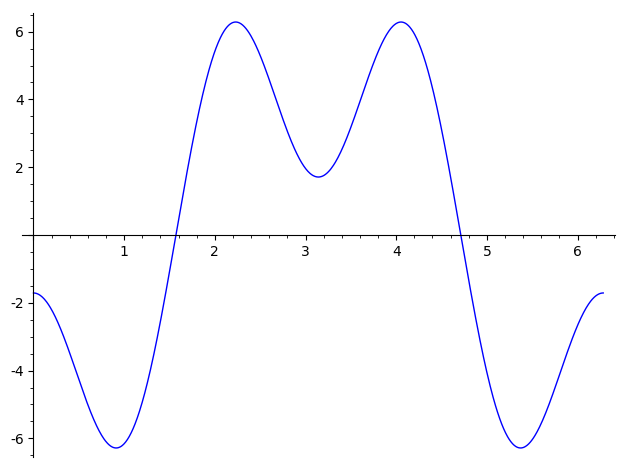

t |--> 4/9*sqrt(6)*pi*cos(3*t) - 2/3*sqrt(6)*pi*cos(t)

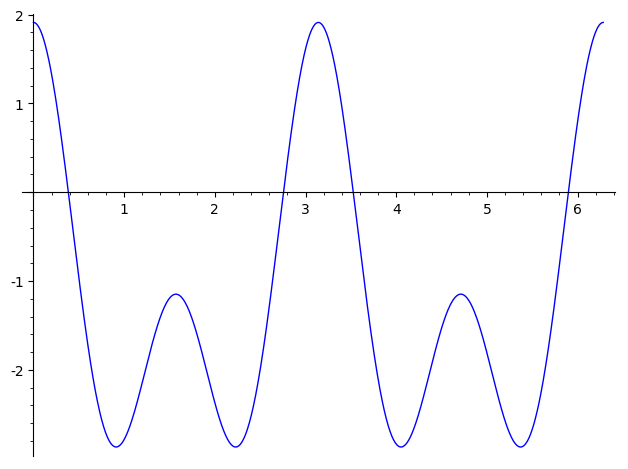

t |--> 4/45*sqrt(10)*sqrt(3)*pi*cos(4*t) + 4/45*sqrt(10)*sqrt(3)*pi*cos(2*t) - 1/15*sqrt(10)*sqrt(3)*pi

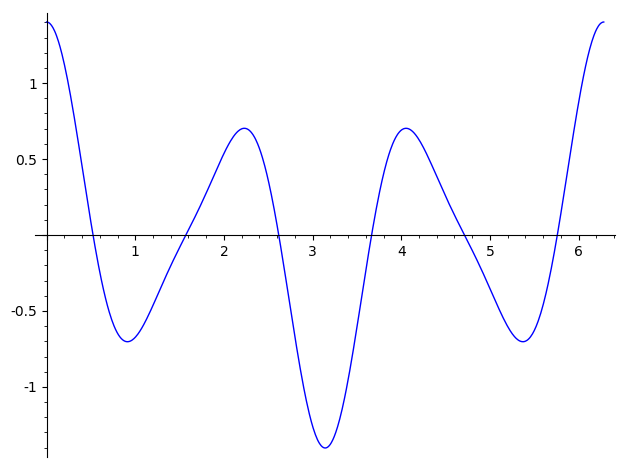

t |--> 2/135*sqrt(6)*sqrt(5)*pi*cos(5*t) + 7/135*sqrt(6)*sqrt(5)*pi*cos(3*t) + 2/135*sqrt(6)*sqrt(5)*pi*cos(t)

In [19]:
tbc_a, tbc_b = three_body_4d[0]

tbc = cos(t)*vector(SR,tbc_a) + sin(t)*vector(SR,tbc_b)

fourier_ts = [0,0,0]

for g in normed_gs[3:]:
    f(t) = g(*tbc).simplify_full().reduce_trig().expand()
    plot( f, (t,0,2*pi)).show()
    pretty_print(f)
    fourier_ts.append( sum([integrate(f*cos(t*n), (t,0,2*pi))*(z^n)/(2*pi) for n in range(-5,6)]) )#-  integrate(f, (t,0,2*pi))/(2*pi) )
        

## Facts:

product of functions leads to convolutions of their Fourier series

when the Fourier series are discrete, "convolution" means multiplication as polynomials


In [20]:
(fourier_ts[3]^2).expand()

8/27*pi^2*z^6 - 8/9*pi^2*z^4 - 2/9*pi^2*z^2 + 52/27*pi^2 - 2/9*pi^2/z^2 - 8/9*pi^2/z^4 + 8/27*pi^2/z^6

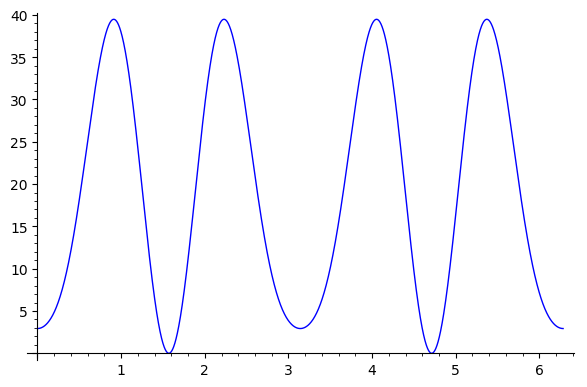

t |--> 16/27*pi^2*cos(6*t) - 16/9*pi^2*cos(4*t) - 4/9*pi^2*cos(2*t) + 52/27*pi^2

In [21]:
f(t) = (normed_gs[3]^2)(*tbc).simplify_full().reduce_trig().expand()
plot( f, (t,0,2*pi)).show()
pretty_print(f)

In [22]:
degree = 30

partitions = [ (i,j,k) for i,j,k in itertools.product(range(1+(degree//3)), 
                                                      range(1+(degree//4)), 
                                                      range(1+(degree//5))) if 3*i+4*j+5*k == degree ]

laur_ser_ft = [ (fourier_ts[3]^i * fourier_ts[4]^j * fourier_ts[5]^k).expand() for i,j,k in partitions ]

nvec = []
for laur_ser in laur_ser_ft:
    v = vector(SR,[0 for _ in range(2+2*degree)])
    for (c,d) in laur_ser.coefficients():
        if d < 0:
            v[1-2*d] = c
        else:
            v[2*d] = c
    nvec.append(v)
    
pretty_print(matrix(nvec).transpose())

62 x 11 dense matrix over Symbolic Ring (use the '.str()' method to see the entries)

In [23]:
matrix(nvec).kernel()

Vector space of degree 11 and dimension 1 over Symbolic Ring
Basis matrix:
[                                         1             -324/16807*sqrt(10)*sqrt(3)/pi      366/12005*sqrt(10)*sqrt(5)*sqrt(3)/pi              -339/6860*sqrt(10)*sqrt(3)/pi                             -27/16807/pi^2                    459/168070*sqrt(5)/pi^2                       -66159/10756480/pi^2                  9151/6722800*sqrt(5)/pi^2       -507/430259200*sqrt(10)*sqrt(3)/pi^3 111/38416000*sqrt(10)*sqrt(5)*sqrt(3)/pi^3                             1/6272000/pi^4]

In [24]:
v = matrix(nvec).kernel().basis_matrix()[0]

v

(1, -324/16807*sqrt(10)*sqrt(3)/pi, 366/12005*sqrt(10)*sqrt(5)*sqrt(3)/pi, -339/6860*sqrt(10)*sqrt(3)/pi, -27/16807/pi^2, 459/168070*sqrt(5)/pi^2, -66159/10756480/pi^2, 9151/6722800*sqrt(5)/pi^2, -507/430259200*sqrt(10)*sqrt(3)/pi^3, 111/38416000*sqrt(10)*sqrt(5)*sqrt(3)/pi^3, 1/6272000/pi^4)

In [29]:
sol = vector([ (normed_gs[3]^i * normed_gs[4]^j * normed_gs[5]^k).expand() for i,j,k in partitions ]) * v

In [30]:
sol.variables()

(y0, y1, y2, y3)

In [32]:
lap(sol,ys).expand()

-27438088/1620675*sqrt(10)*sqrt(5)*sqrt(3)*sqrt(2)*sqrt(3/10)*sqrt(1/5)*pi^6*y0^24*y1*y2^3 + 1429576/21609*sqrt(10)*sqrt(5)*sqrt(3)*sqrt(2)*sqrt(3/10)*sqrt(1/5)*pi^6*y0^22*y1^3*y2^3 + 2197054252/14586075*sqrt(10)*sqrt(5)*sqrt(3)*sqrt(2)*sqrt(3/10)*sqrt(1/5)*pi^6*y0^20*y1^5*y2^3 - 18614772256/14586075*sqrt(10)*sqrt(5)*sqrt(3)*sqrt(2)*sqrt(3/10)*sqrt(1/5)*pi^6*y0^18*y1^7*y2^3 + 128531994772/43758225*sqrt(10)*sqrt(5)*sqrt(3)*sqrt(2)*sqrt(3/10)*sqrt(1/5)*pi^6*y0^16*y1^9*y2^3 - 207175769072/56260575*sqrt(10)*sqrt(5)*sqrt(3)*sqrt(2)*sqrt(3/10)*sqrt(1/5)*pi^6*y0^14*y1^11*y2^3 + 69804650984/33756345*sqrt(10)*sqrt(5)*sqrt(3)*sqrt(2)*sqrt(3/10)*sqrt(1/5)*pi^6*y0^12*y1^13*y2^3 - 3357310287008/1181472075*sqrt(10)*sqrt(5)*sqrt(3)*sqrt(2)*sqrt(3/10)*sqrt(1/5)*pi^6*y0^10*y1^15*y2^3 + 1561861666864/1181472075*sqrt(10)*sqrt(5)*sqrt(3)*sqrt(2)*sqrt(3/10)*sqrt(1/5)*pi^6*y0^8*y1^17*y2^3 - 3880288733368/3544416225*sqrt(10)*sqrt(5)*sqrt(3)*sqrt(2)*sqrt(3/10)*sqrt(1/5)*pi^6*y0^6*y1^19*y2^3 + 7613641798132/31

# End Here

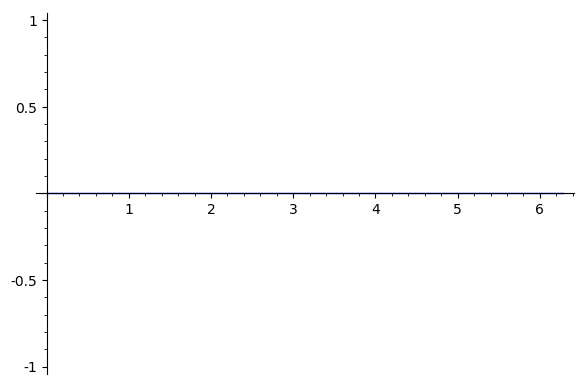

t |--> 0

In [115]:
f(t) = (sol)(*tbc).simplify_full().reduce_trig().expand()
plot( f, (t,0,2*pi)).show()
pretty_print(f)

In [116]:
def inverse_sterographic_projection(f):
    return f(y0 = 2*x/(1+x^2+y^2+z^2), 
             y1 = 2*y/(1+x^2+y^2+z^2),
             y2 = 2*z/(1+x^2+y^2+z^2), 
             y3 = (-1+x^2+y^2+z^2)/(1+x^2+y^2+z^2))

In [117]:
P_zero = implicit_plot3d( inverse_sterographic_projection(sol) == 0, (x,-10,10), (y,-10,10), (z,-10,10))

In [118]:
#P_zero + P_threecurves

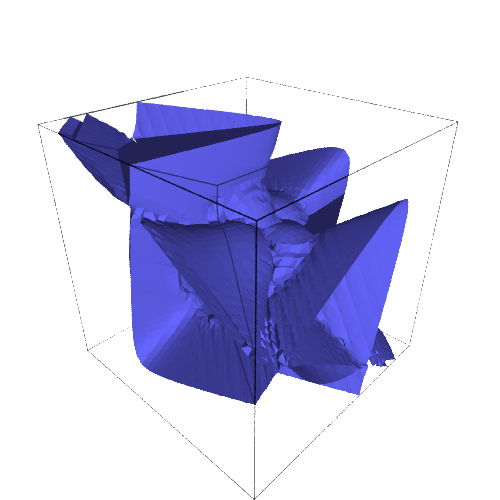

In [119]:
P_zero.show(viewer='tachyon')

In [101]:
l = lap(sol,ys)

In [120]:
#l.expand().simplify_full()

In [10]:
# a harmonic symmetric function of degree ell in 5 variables
sym_fn = 0
ell = 20
for vec in list(identity_matrix(5)):
    sym_fn += (r^ell*gegenbauer(ell,5/2-1,
                                (vec/norm(vec))*(vector(xs)/norm(vector(xs)))))\
    (r=sqrt(sum([xi^2 for xi in xs]))).simplify_full()

# check symmetry
assert (sym_fn(x0=x1,x1=x0)-sym_fn).expand() == 0
assert (sym_fn(x0=x2,x2=x0)-sym_fn).expand() == 0
assert (sym_fn(x0=x3,x3=x0)-sym_fn).expand() == 0
assert (sym_fn(x0=x4,x4=x0)-sym_fn).expand() == 0

# is harmonic
assert lap(sym_fn,xs).simplify_full() == 0

#sym_fn.expand()